In [2]:
#Added imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import precision_score, recall_score, f1_score
# from keras.models import Sequential
# from keras.layers import Dense

In [3]:
#compare the predicted anomalies with the ground truth and compute the metrics.
def evaluate_model(predictions, true_labels):
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    return precision, recall, f1

In [4]:
#Loading up the Data
data = pd.read_csv(
    "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-03-2022.csv")
data.tail(20)


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
3996,NaN,NaN,Wales,United Kingdom,2022-01-04 04:22:17,52.130700,-3.783700,646159,9334,NaN,NaN,"Wales, United Kingdom",20587.491238,1.018480
3997,NaN,NaN,NaN,Uruguay,2022-01-04 04:22:17,-32.522800,-55.765800,416970,6177,NaN,NaN,Uruguay,12003.533956,1.481402
3998,NaN,NaN,NaN,Uzbekistan,2022-01-04 04:22:17,41.377491,64.585262,199182,1485,NaN,NaN,Uzbekistan,595.120307,0.745549
3999,NaN,NaN,NaN,Vanuatu,2022-01-04 04:22:17,-15.376700,166.959200,7,1,NaN,NaN,Vanuatu,2.391691,14.285714
4000,NaN,NaN,NaN,Venezuela,2022-01-04 04:22:17,6.423800,-66.589700,445082,5335,NaN,NaN,Venezuela,1565.209214,1.198656
4001,NaN,NaN,NaN,Vietnam,2022-01-04 04:22:17,14.058324,108.277199,1778976,33021,NaN,NaN,Vietnam,1827.616496,1.856180
4002,NaN,NaN,NaN,West Bank and Gaza,2022-01-04 04:22:17,31.952200,35.233200,469748,4919,NaN,NaN,West Bank and Gaza,9208.188472,1.047157
4003,NaN,NaN,NaN,Yemen,2022-01-04 04:22:17,15.552727,48.516388,10138,1984,NaN,NaN,Yemen,33.990515,19.569935
4004,NaN,NaN,NaN,Zambia,2022-01-04 04:22:17,-13.133897,27.849332,261221,3753,NaN,NaN,Zambia,1420.918327,1.436715
4005,NaN,NaN,NaN,Zimbabwe,2022-01-04 04:22:17,-19.015438,29.154857,216087,5047,NaN,NaN,Zimbabwe,1453.865716,2.335633


In [5]:
#Data Cleaning
# from datetime import dt
data['Last_Update'] = pd.to_datetime(df['Last_Update'])
data['date'] = data['Last_Update'].dt.strftime('%m-%d-%Y')


NameError: name 'df' is not defined

In [ ]:
#Feature Engineering: Create relevant features that could help in detecting anomalies, such as moving averages, differences between consecutive days, or rolling windows

data['daily_cases'] = data['Confirmed'].diff().fillna(0)
data['rolling_avg'] = data['daily_cases'].rolling(window= 7).mean().fillna(0)

data.tail(20)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,date,daily_cases,rolling_avg
3996,NaN,NaN,Wales,United Kingdom,2022-01-04 04:22:17,52.130700,-3.783700,646159,9334,NaN,NaN,"Wales, United Kingdom",20587.491238,1.018480,01-04-2022,646159.0,90343.571429
3997,NaN,NaN,NaN,Uruguay,2022-01-04 04:22:17,-32.522800,-55.765800,416970,6177,NaN,NaN,Uruguay,12003.533956,1.481402,01-04-2022,-229189.0,59557.714286
3998,NaN,NaN,NaN,Uzbekistan,2022-01-04 04:22:17,41.377491,64.585262,199182,1485,NaN,NaN,Uzbekistan,595.120307,0.745549,01-04-2022,-217788.0,-28983.857143
3999,NaN,NaN,NaN,Vanuatu,2022-01-04 04:22:17,-15.376700,166.959200,7,1,NaN,NaN,Vanuatu,2.391691,14.285714,01-04-2022,-199175.0,0.428571
4000,NaN,NaN,NaN,Venezuela,2022-01-04 04:22:17,6.423800,-66.589700,445082,5335,NaN,NaN,Venezuela,1565.209214,1.198656,01-04-2022,445075.0,-74420.714286
4001,NaN,NaN,NaN,Vietnam,2022-01-04 04:22:17,14.058324,108.277199,1778976,33021,NaN,NaN,Vietnam,1827.616496,1.856180,01-04-2022,1333894.0,253630.571429
4002,NaN,NaN,NaN,West Bank and Gaza,2022-01-04 04:22:17,31.952200,35.233200,469748,4919,NaN,NaN,West Bank and Gaza,9208.188472,1.047157,01-04-2022,-1309228.0,67106.857143
4003,NaN,NaN,NaN,Yemen,2022-01-04 04:22:17,15.552727,48.516388,10138,1984,NaN,NaN,Yemen,33.990515,19.569935,01-04-2022,-459610.0,-90860.142857
4004,NaN,NaN,NaN,Zambia,2022-01-04 04:22:17,-13.133897,27.849332,261221,3753,NaN,NaN,Zambia,1420.918327,1.436715,01-04-2022,251083.0,-22249.857143
4005,NaN,NaN,NaN,Zimbabwe,2022-01-04 04:22:17,-19.015438,29.154857,216087,5047,NaN,NaN,Zimbabwe,1453.865716,2.335633,01-04-2022,-45134.0,2415.000000


In [ ]:
#Normalization

scaler = StandardScaler()
data[['daily_cases', 'rolling_avg']] = scaler.fit_transform(data[['daily_cases', 'rolling_avg']])
data.tail(20)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,date,daily_cases,rolling_avg
3996,NaN,NaN,Wales,United Kingdom,2022-01-04 04:22:17,52.130700,-3.783700,646159,9334,NaN,NaN,"Wales, United Kingdom",20587.491238,1.018480,01-04-2022,1.234054,1.153486
3997,NaN,NaN,NaN,Uruguay,2022-01-04 04:22:17,-32.522800,-55.765800,416970,6177,NaN,NaN,Uruguay,12003.533956,1.481402,01-04-2022,-0.437610,0.760551
3998,NaN,NaN,NaN,Uzbekistan,2022-01-04 04:22:17,41.377491,64.585262,199182,1485,NaN,NaN,Uzbekistan,595.120307,0.745549,01-04-2022,-0.415837,-0.369549
3999,NaN,NaN,NaN,Vanuatu,2022-01-04 04:22:17,-15.376700,166.959200,7,1,NaN,NaN,Vanuatu,2.391691,14.285714,01-04-2022,-0.380292,0.000392
4000,NaN,NaN,NaN,Venezuela,2022-01-04 04:22:17,6.423800,-66.589700,445082,5335,NaN,NaN,Venezuela,1565.209214,1.198656,01-04-2022,0.850041,-0.949482
4001,NaN,NaN,NaN,Vietnam,2022-01-04 04:22:17,14.058324,108.277199,1778976,33021,NaN,NaN,Vietnam,1827.616496,1.856180,01-04-2022,2.547431,3.237599
4002,NaN,NaN,NaN,West Bank and Gaza,2022-01-04 04:22:17,31.952200,35.233200,469748,4919,NaN,NaN,West Bank and Gaza,9208.188472,1.047157,01-04-2022,-2.500175,0.856904
4003,NaN,NaN,NaN,Yemen,2022-01-04 04:22:17,15.552727,48.516388,10138,1984,NaN,NaN,Yemen,33.990515,19.569935,01-04-2022,-0.877648,-1.159307
4004,NaN,NaN,NaN,Zambia,2022-01-04 04:22:17,-13.133897,27.849332,261221,3753,NaN,NaN,Zambia,1420.918327,1.436715,01-04-2022,0.479572,-0.283600
4005,NaN,NaN,NaN,Zimbabwe,2022-01-04 04:22:17,-19.015438,29.154857,216087,5047,NaN,NaN,Zimbabwe,1453.865716,2.335633,01-04-2022,-0.086118,0.031210


In [ ]:
data['is_anomaly'] = 0
data.loc[1, 'is_anomaly'] = 1  # Mark known anomalies

In [ ]:
# Anomaly Detection Method: Isolation Forest
model = IsolationForest(contamination= 0.01)
data['anomaly_if'] = model.fit_predict(data[['daily_cases', 'rolling_avg']])
data['anomaly_if'] = data['anomaly_if'].apply(lambda x: 1 if x == -1 else 0)
anomalies = data[data['is_anomaly'] == -1]

precision_if, recall_if, f1_if = evaluate_model(data['anomaly_if'], data['is_anomaly'])
print(f'Isolation Forest - Precision: {precision_if}, Recall: {recall_if}, F1-Score: {f1_if}')


Isolation Forest - Precision: 0.0, Recall: 0.0, F1-Score: 0.0


In [ ]:
#Anomaly Detection Method: One-Class SVM

model = OneClassSVM(nu = 0.01, kernel= "rbf", gamma= 0.1)
data['anomaly_svm'] = model.fit_predict(data[["daily_cases", "rolling_avg"]])
data['anomaly_svm'] = data['anomaly_svm'].apply(lambda x: 1 if x == -1 else 0)
anomalies = data[data['is_anomaly'] == -1]
precision_svm, recall_svm, f1_svm = evaluate_model(data['anomaly_svm'], data['is_anomaly'])
print(f'One-Class SVM - Precision: {precision_svm}, Recall: {recall_svm}, F1-Score: {f1_svm}')


One-Class SVM - Precision: 0.0, Recall: 0.0, F1-Score: 0.0


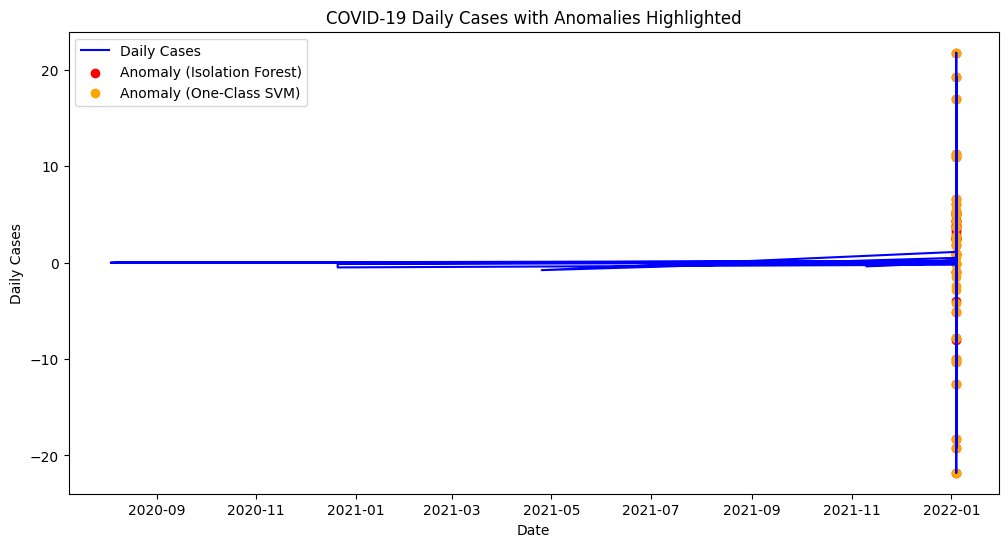

In [ ]:
import matplotlib.pyplot as plt

# Example data: Replace 'date' with the appropriate date column name in your dataset
data['date'] = pd.to_datetime(data['date'])

plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['daily_cases'], label='Daily Cases', color='blue')
plt.scatter(data[data['anomaly_if'] == 1]['date'], data[data['anomaly_if'] == 1]['daily_cases'], 
            color='red', label='Anomaly (Isolation Forest)')
plt.scatter(data[data['anomaly_svm'] == 1]['date'], data[data['anomaly_svm'] == 1]['daily_cases'], 
            color='orange', label='Anomaly (One-Class SVM)')

plt.xlabel('Date')
plt.ylabel('Daily Cases')
plt.title('COVID-19 Daily Cases with Anomalies Highlighted')
plt.legend()
plt.show()


In [6]:
results = {
    'Method': ['Isolation Forest', 'One-Class SVM'],
    'Precision': [precision_if, precision_svm],
    'Recall': [recall_if, recall_svm],
    'F1-Score': [f1_if, f1_svm]
}

results_df = pd.DataFrame(results)
print(results_df)

NameError: name 'precision_if' is not defined